<a href="https://colab.research.google.com/github/ThanhToan2002/BT/blob/main/Cuoi_ki_Do_ann_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/DoanVN/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

test_set=test_data.flow_from_directory('/content/drive/MyDrive/DoanVN/Validation',target_size=(300,300 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices


Found 1500 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


{'Banh xeo': 0, 'Bun dau mam tom': 1, 'Ca kho to': 2, 'Com tam': 3, 'Pho': 4}

In [14]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization                               #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(512,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(1024,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(1024,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                 

In [16]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 30 , batch_size= 1024 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/30
47/47 [==============================] - 56s 1s/step - loss: 1.4938 - accuracy: 0.3613
Epoch 2/30
47/47 [==============================] - 54s 1s/step - loss: 1.1414 - accuracy: 0.5593
Epoch 3/30
47/47 [==============================] - 54s 1s/step - loss: 0.9601 - accuracy: 0.6207
Epoch 4/30
47/47 [==============================] - 54s 1s/step - loss: 0.8483 - accuracy: 0.6853
Epoch 5/30
47/47 [==============================] - 54s 1s/step - loss: 0.9625 - accuracy: 0.6487
Epoch 6/30
47/47 [==============================] - 54s 1s/step - loss: 0.8284 - accuracy: 0.6860
Epoch 7/30
47/47 [==============================] - 54s 1s/step - loss: 0.6496 - accuracy: 0.7673
Epoch 8/30
47/47 [==============================] - 54s 1s/step - loss: 0.6252 - accuracy: 0.7727
Epoch 9/30
47/47 [==============================] - 54s 1s/step - loss: 0.5451 - accuracy: 0.8053
Epoch 10/30
47/47 [==============================] - 53s 1s/step - loss: 0.5200 - accuracy: 0.8140
Epoch 11/30
47/47 [

In [17]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [18]:
#Lưu
from keras.models import load_model
model.save("DoanCuoik.h5")
model_1=load_model('DoanCuoik.h5')

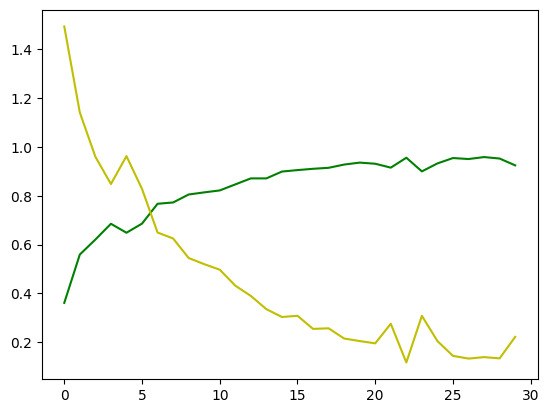

In [19]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 103ms/step
Banh xeo


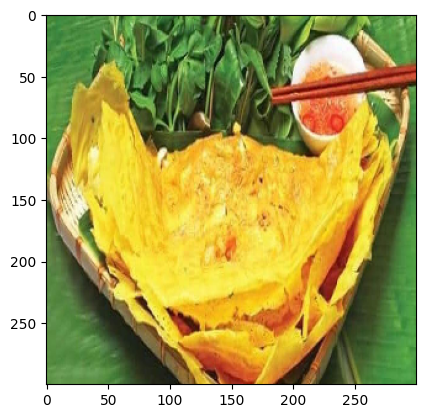

1/1 [==============================] - 0s 23ms/step
Banh xeo


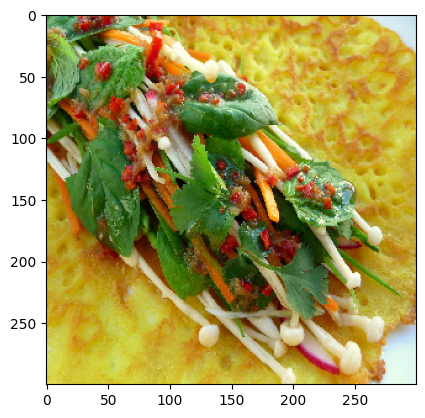

1/1 [==============================] - 0s 22ms/step
Bun dau mam tom


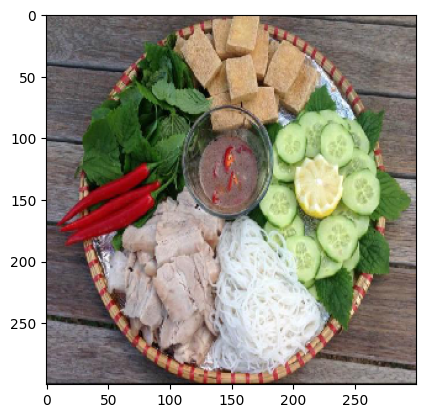

1/1 [==============================] - 0s 21ms/step
Bun dau mam tom


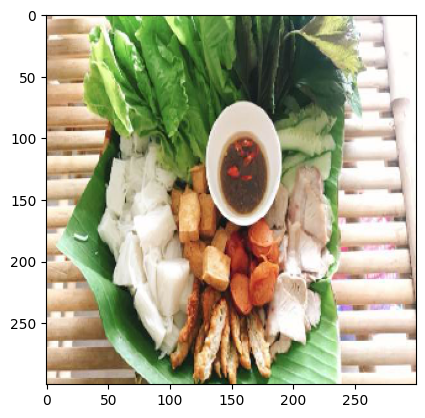

1/1 [==============================] - 0s 19ms/step
Com tam


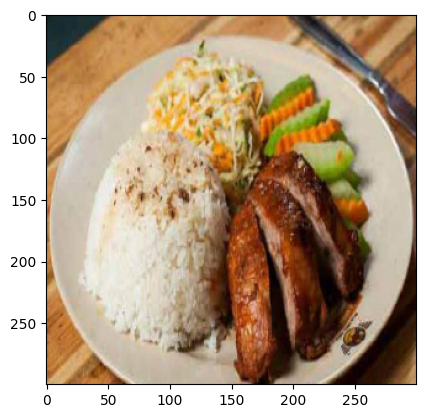

1/1 [==============================] - 0s 27ms/step
Com tam


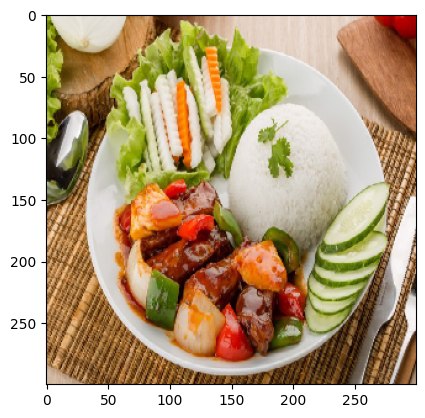

1/1 [==============================] - 0s 23ms/step
Pho


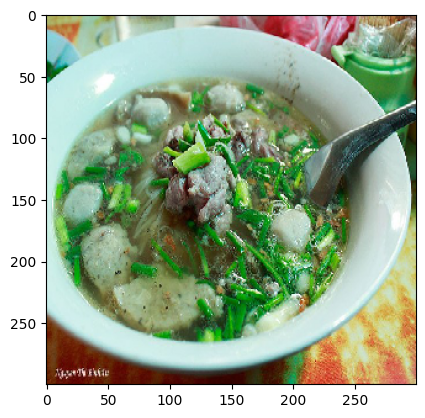

1/1 [==============================] - 0s 25ms/step
Pho


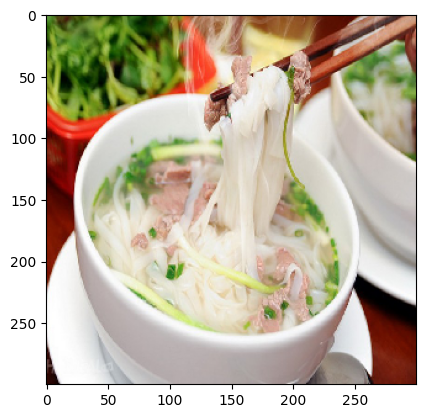

1/1 [==============================] - 0s 21ms/step
Ca kho to


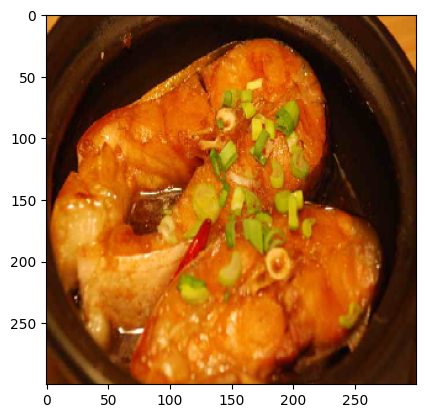

1/1 [==============================] - 0s 21ms/step
Ca kho to


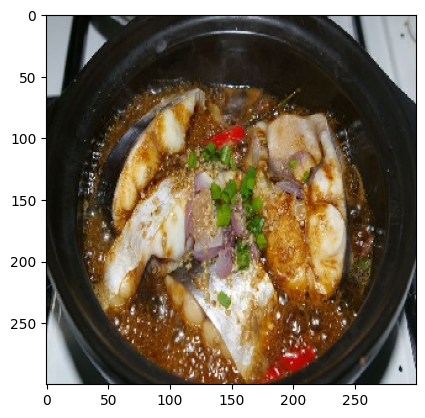

In [20]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt 

test='/content/drive/MyDrive/DoanVN/Test'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Banh xeo','Bun dau mam tom','Ca kho to','Com tam','Pho']
  print(class_name[result]) 
  plt.show()